<a href="https://colab.research.google.com/github/AlfredoSales/ciencia-de-dados-e-analytics/blob/main/winespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP - Alfredo Sales
Disciplina: Sprint I: Análise de Dados e Boas Práticas

A partir da análise desta base, vamos responder as seguintes perguntas:

Quais "Condados" são os maiores produtores de vinhos?
Quais "Condados" vendem os vinhos mais caros:
Diferença de arrecadação por Condados.


In [148]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


IMPORTAÇÃO DA BASE DE DADOS

In [149]:
df = pd.read_csv('https://raw.githubusercontent.com/AlfredoSales/datasetPUC-RJ_Sprint1/main/Californa_Wine_Production_1980_2020.csv')
print (df.shape)
df.head()

(1315, 11)


,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
0,2020,216299,GRAPESWINE,1,Alameda,2530.0,5.14,13000.0,1497.69,Tons,19470000
1,2020,216299,GRAPESWINE,5,Amador,5360.0,2.31,12400.0,1318.31,Tons,16347000
2,2020,216299,GRAPESWINE,9,Calaveras,579.0,3.06,1770.0,1325.99,Tons,2347000
3,2020,216299,GRAPESWINE,11,Colusa,747.0,6.02,4500.0,684.67,Tons,3081000
4,2020,216299,GRAPESWINE,13,ContraCosta,1940.0,4.69,9090.0,751.27,Tons,6829000


In [150]:
# limpando as vírgulas
df.replace(',','', regex=True, inplace=True)
df.head()

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
0,2020,216299,GRAPESWINE,1,Alameda,2530.0,5.14,13000.0,1497.69,Tons,19470000
1,2020,216299,GRAPESWINE,5,Amador,5360.0,2.31,12400.0,1318.31,Tons,16347000
2,2020,216299,GRAPESWINE,9,Calaveras,579.0,3.06,1770.0,1325.99,Tons,2347000
3,2020,216299,GRAPESWINE,11,Colusa,747.0,6.02,4500.0,684.67,Tons,3081000
4,2020,216299,GRAPESWINE,13,ContraCosta,1940.0,4.69,9090.0,751.27,Tons,6829000


In [151]:
df.tail()

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
1310,1980,216299,GRAPESWINE,95,Solano,1138.0,3.99,4544.0,315.0,TONS,1433300
1311,1980,216299,GRAPESWINE,97,Sonoma,23639.0,3.34,78941.0,506.0,TONS,39982000
1312,1980,216299,GRAPESWINE,99,Stanislaus,17950.0,8.80,157900.0,183.0,TONS,28848000
1313,1980,216299,GRAPESWINE,107,Tulare,15159.0,8.88,134600.0,170.0,TONS,22902000
1314,1980,216299,GRAPESWINE,113,Yolo,566.0,8.70,4924.0,274.0,TONS,1351000


In [152]:
# verificando a integridade dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1315 non-null   int64  
 1   CommodityCode        1315 non-null   int64  
 2   CropName             1315 non-null   object 
 3   CountyCode           1315 non-null   int64  
 4   County               1315 non-null   object 
 5   HarvestedAcres       1302 non-null   float64
 6   Yield(Unit/Acre)     1266 non-null   float64
 7   Production           1278 non-null   float64
 8   Price(Dollars/Unit)  1278 non-null   float64
 9   Unit                 1279 non-null   object 
 10  Value(Dollars)       1315 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 113.1+ KB


In [153]:
df['Price(Dollars/Unit)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1315 entries, 0 to 1314
Series name: Price(Dollars/Unit)
Non-Null Count  Dtype  
--------------  -----  
1278 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [154]:
# verificando a quantidade de produtores
print("Colheita vinho: ", (len(df.CropName.value_counts())))
print("Condados: ", (len(df.County.value_counts())))
print("Unidade: ", (len(df.Unit.value_counts())),"\n")

df.County.value_counts()

Colheita vinho:  1
Condados:  42
Unidade:  5 



Alameda          41
Merced           41
Yolo             41
Tulare           41
Sonoma           41
Solano           41
SanJoaquin       41
SanDiego         41
SanBenito        41
Sacramento       41
Riverside        41
Napa             41
SanBernardino    41
Fresno           41
Madera           41
Lake             41
Kings            41
Kern             41
Calaveras        40
Mendocino        39
Amador           39
Nevada           38
SanLuisObispo    37
SantaClara       37
SantaBarbara     36
Monterey         36
SantaCruz        36
ElDorado         33
Mariposa         30
Placer           28
SanMateo         28
Marin            22
Stanislaus       21
Trinity          20
Yuba             14
Shasta           12
ContraCosta      11
Colusa           10
Mono              4
Tehama            3
Glenn             2
SanLuisObisp      1
Name: County, dtype: int64

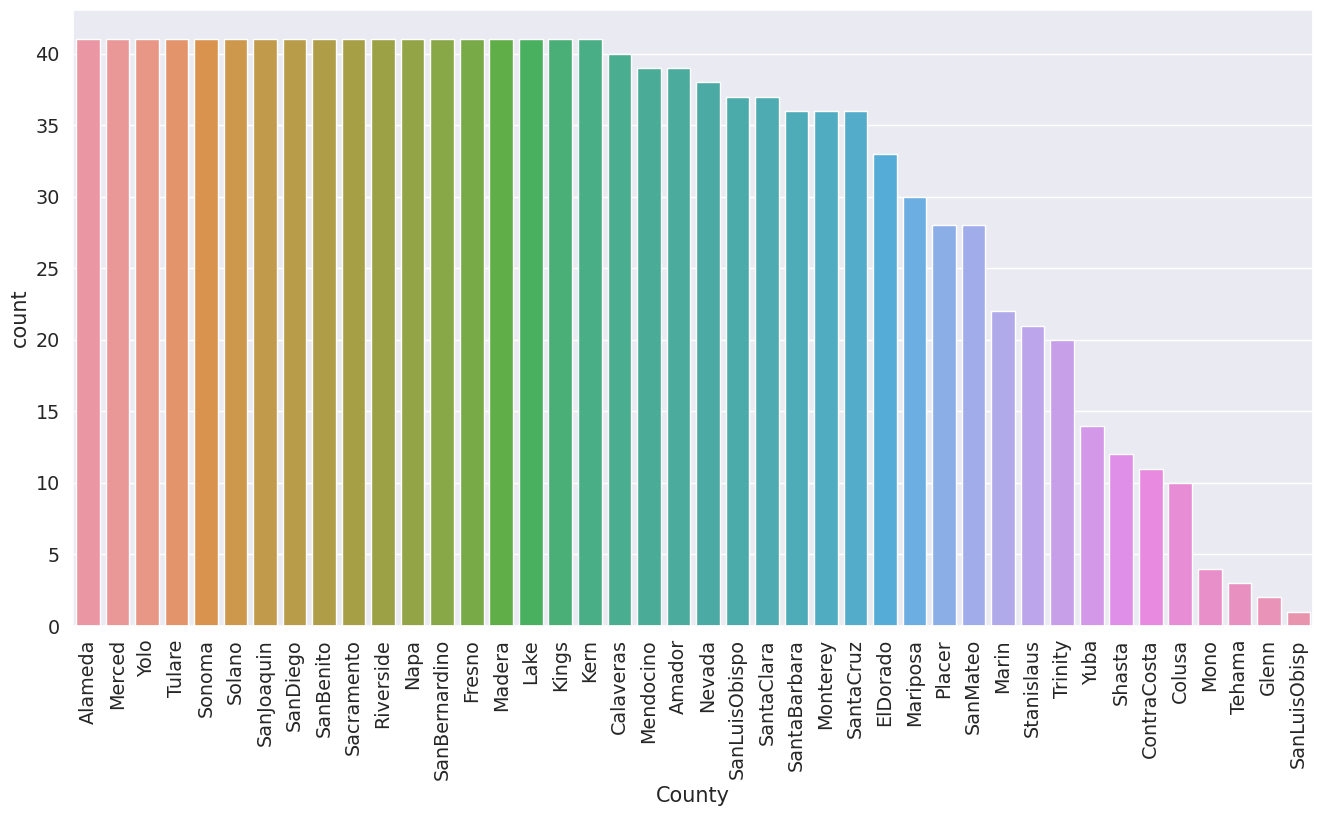

In [155]:
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x=df.County, order=df.County.value_counts().index);
plt.xticks(rotation=90)
plt.show();

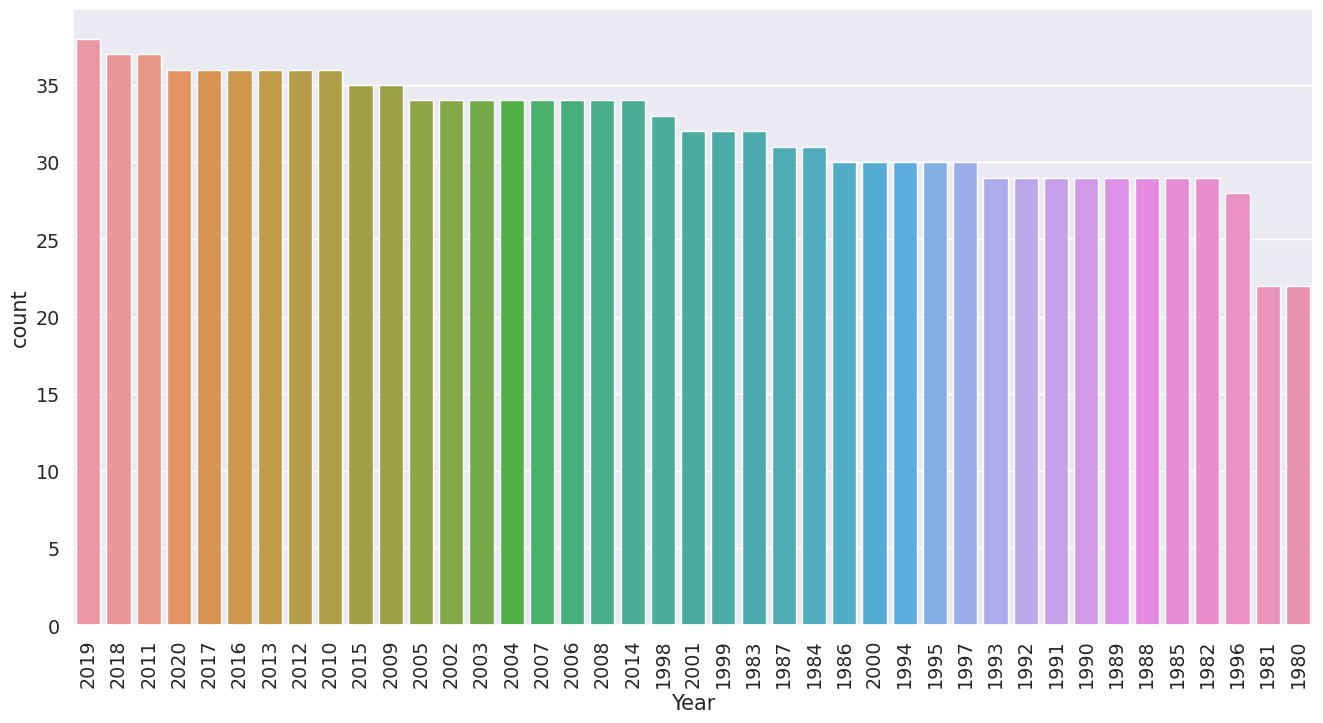

In [156]:
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x=df.Year, order=df.Year.value_counts().index);
plt.xticks(rotation=90)
plt.show();


In [157]:
grouped_df = df.groupby("County")

mean_df = grouped_df.mean()

mean_df = mean_df.reset_index()

# print(round(mean_df,2))
round(mean_df.sort_values('Price(Dollars/Unit)', ascending=False),2)

,County,Year,CommodityCode,CountyCode,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Value(Dollars)
12,Marin,2009.50,216299.0,41.0,154.41,1.49,225.32,2973.52,6.884591e+05
18,Napa,2000.00,216299.0,55.0,35215.85,3.65,127186.93,2484.91,3.439452e+08
32,SantaCruz,2002.39,216299.0,87.0,420.50,2.06,948.53,2059.34,2.267944e+06
37,Tehama,2019.00,216299.0,103.0,147.00,4.25,618.67,1749.16,1.088333e+06
35,Sonoma,2000.00,216299.0,97.0,42898.68,3.86,164203.02,1615.89,2.991575e+08
41,Yuba,2004.50,216299.0,115.0,172.50,2.01,303.79,1542.39,1.454034e+08
38,Trinity,2007.90,216299.0,105.0,94.69,2.13,163.67,1382.57,2.132500e+05
27,SanLuisObisp,2012.00,216299.0,79.0,36600.00,4.10,150000.00,1319.60,1.979400e+08
26,SanJoaquin,2000.00,216299.0,77.0,70744.56,6.88,480662.83,1282.88,2.231489e+08
30,SantaBarbara,2000.61,216299.0,83.0,14581.81,3.54,53273.67,1226.39,7.332722e+07


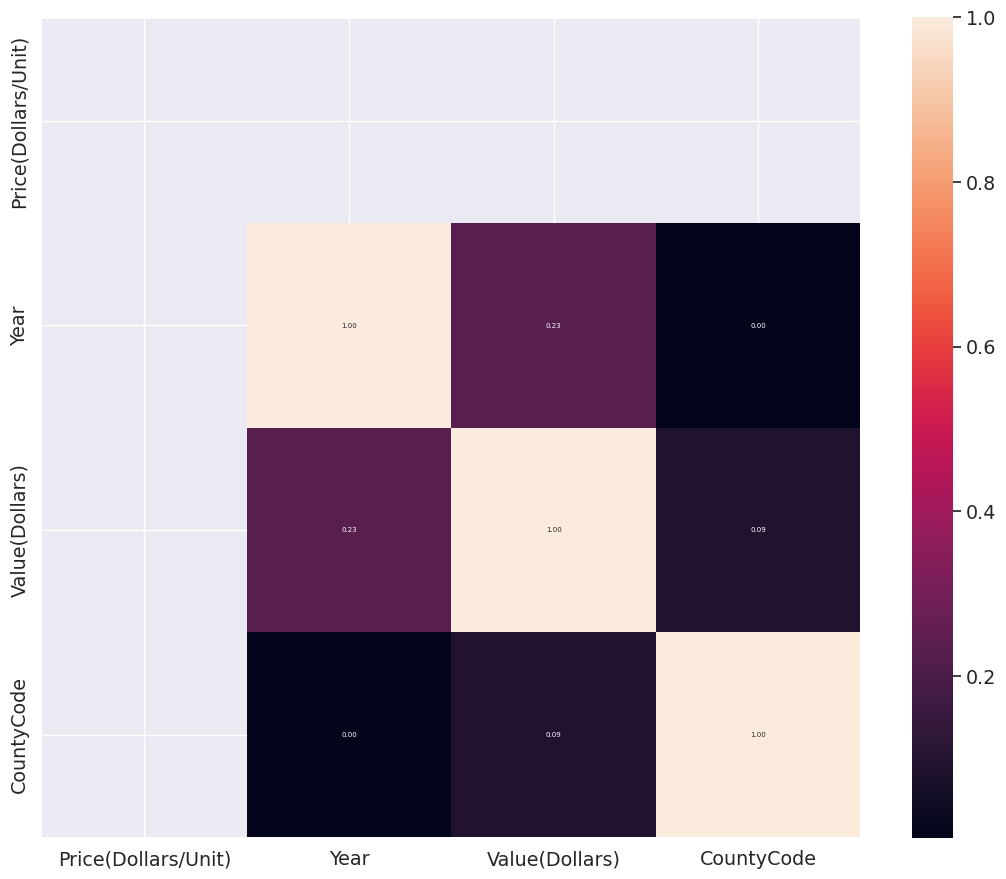

In [158]:
# Matriz de correlação
corr = df.corr()

# finding the most correlated variables
cols = corr.nlargest(4, 'Price(Dollars/Unit)')['Price(Dollars/Unit)'].index
cm = np.corrcoef(df[cols].values.T)

# plotting the heatmap
f, ax = plt.subplots(figsize=(11, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

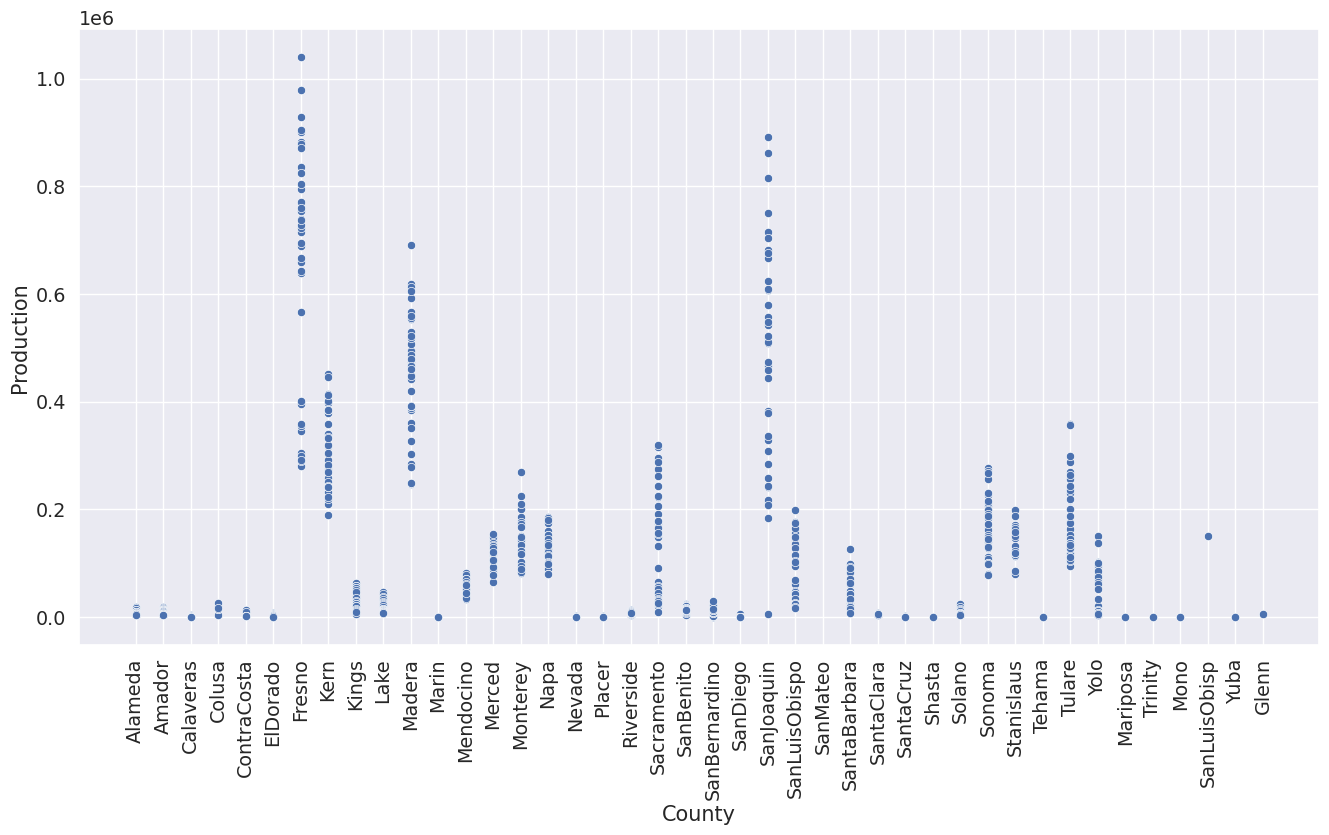

In [159]:
# Produção por Condados
f, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(x=df.County, y=df.Production)
plt.xticks(rotation=90)
plt.show();

In [ ]:
sns.pairplot(df, hue = "County");

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# verificando nulls no dataset
df.isnull().sum()

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = df[col[:]]

# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)